In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 
%config IPCompleter.greedy=True

## Reading data from file

In [2]:
from collections import Counter

data1 = pd.read_csv("20151219.txt", sep = "\t", header = None)
data1.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]

data2 = pd.read_csv("20151220.txt", sep = "\t", header = None)
data2.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]

data = data1.append(data2, ignore_index=True)

print(Counter(data["attack_flag"]))

Counter({-1: 338997, 1: 80149})


## Transform to binary

In [3]:
data.loc[:, "attack_flag"] = data.loc[:,"attack_flag"].replace(-2, -1)
data.loc[:, "attack_flag"] = data.loc[:, "attack_flag"] * -1
data.loc[:, "attack_flag"] = data.loc[:,"attack_flag"].replace(-1, 0)

print(Counter(data["attack_flag"]))

Counter({1: 338997, 0: 80149})


## Visualize the attacks structure over time 

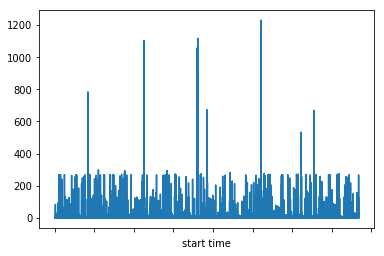

In [4]:
data_red = data.groupby('start time')['attack_flag'].sum()
data_red.plot()

In [5]:
# slice dataset, drop additional features
print(data.shape)
data = data.drop(['start time', 'dst IP', 'src IP'], axis=1)
print(data.shape)

# drop software markers
data = data.drop(["IDS detection", "Malware detection", "Ashula detection"], axis=1)
data["attack_flag"].value_counts()

(419146, 24)
(419146, 21)


1    338997
0     80149
Name: attack_flag, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419146 entries, 0 to 419145
Data columns (total 18 columns):
conn len                       419146 non-null float64
service                        419146 non-null object
src bytes                      419146 non-null int64
dst bytes                      419146 non-null int64
conn numb                      419146 non-null int64
Same srv rate                  419146 non-null float64
Serror rate                    419146 non-null float64
Srv serror rate                419146 non-null float64
Dst host count                 419146 non-null int64
Dst host srv count             419146 non-null int64
Dst host same src port rate    419146 non-null float64
Dst host serror rate           419146 non-null float64
Dst host srv serror rate       419146 non-null float64
Conn state                     419146 non-null object
attack_flag                    419146 non-null int64
src port                       419146 non-null int64
dst port                 

In [7]:
data.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,Conn state,attack_flag,src port,dst port,proto
419136,0.000000,other,0,0,0,0.0,0.0,1.00,0,0,0.0,0.0,0.0,S0,1,54695,8081,tcp
419137,0.000000,other,0,0,0,0.0,0.0,0.00,1,1,0.0,1.0,1.0,S0,1,44997,21320,tcp
419138,0.485847,other,0,0,0,0.0,0.0,1.00,5,4,0.0,0.0,0.0,RSTR,1,65024,3389,tcp
419139,3.253905,other,0,0,0,0.0,0.0,0.50,1,39,1.0,1.0,1.0,S0,1,18399,25,tcp
419140,0.000000,other,0,0,0,0.0,0.0,0.67,4,4,1.0,1.0,1.0,S0,1,33863,20012,tcp
419141,0.000000,other,0,0,0,0.0,0.0,0.75,0,0,0.0,0.0,0.0,OTH,1,3,3,icmp
419142,3.135446,rdp,1726,5591,1,0.0,0.0,0.00,5,72,0.0,0.0,0.0,S1,1,62518,3389,tcp
419143,0.000000,other,0,0,0,0.0,0.0,0.60,0,2,0.0,0.0,1.0,S0,1,35137,123,udp
419144,0.000000,other,0,0,0,0.0,0.0,0.67,0,0,0.0,0.0,0.0,S0,1,42613,81,tcp
419145,0.000000,other,0,0,0,0.0,0.0,1.00,0,0,0.0,0.0,0.0,S0,1,42346,21320,tcp


In [8]:
data.describe()

,conn len,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,attack_flag,src port,dst port
count,419146.000000,4.191460e+05,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000,419146.000000
mean,0.897800,2.168004e+04,364.750896,2.522923,0.357259,0.064550,0.548421,25.437657,28.919419,0.073814,0.068824,0.153320,0.808780,34004.366686,3584.727816
std,4.749450,4.708272e+06,2285.497265,5.451557,0.477454,0.244823,0.462899,41.519257,42.252740,0.259441,0.252677,0.357215,0.393262,19713.691673,10928.964687
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12375.000000,23.000000
50%,0.000091,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,38884.000000,53.000000
75%,0.721284,4.500000e+01,77.000000,3.000000,1.000000,0.000000,1.000000,73.000000,92.000000,0.000000,0.000000,0.000000,1.000000,50359.000000,1433.000000
max,1061.910079,1.696585e+09,157723.000000,84.000000,1.000000,1.000000,1.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,65535.000000,65507.000000


In [9]:
# removing NaNs
data = data.dropna()
data.shape

(419146, 18)

In [10]:
data["Conn state"].value_counts(dropna=False)

S0        247950
SF        104018
RSTO       26466
OTH        19608
REJ        15659
RSTRH       1853
RSTOS0      1514
SHR         1195
RSTR         778
S1           103
SH             2
Name: Conn state, dtype: int64

In [11]:
data["service"].value_counts(dropna=False)

other      259775
dns        102883
ssh         29769
sip         20915
rdp          3640
snmp         1096
smtp          999
dhcp           43
http           21
ssl             3
dns,sip         2
Name: service, dtype: int64

In [12]:
data["proto"].value_counts(dropna=False)

tcp     256581
udp     153868
icmp      8697
Name: proto, dtype: int64

# a bit of feature engineering

## port numbers classification

In [13]:
t1 = 1023  # well-known port numbers
t2 = 49151 # registered ports
t3 = 65535 # client ports

def wk(data_row):
    if (data_row["src port"] <= t1): 
        value = 1
    elif ((data_row["src port"] > t1) and (data_row["src port"] <= t2)):
        value = 0
    elif ((data_row["src port"] > t2) and (data_row["src port"] <= t3)):
        value = 0
    return value

def reg(data_row):
    if (data_row["src port"] <= t1): 
        value = 0
    elif ((data_row["src port"] > t1) and (data_row["src port"] <= t2)):
        value = 1
    elif ((data_row["src port"] > t2) and (data_row["src port"] <= t3)):
        value = 0
    return value

def cli(data_row):
    if (data_row["src port"] <= t1): 
        value = 0
    elif ((data_row["src port"] > t1) and (data_row["src port"] <= t2)):
        value = 0
    elif ((data_row["src port"] > t2) and (data_row["src port"] <= t3)):
        value = 1
    return value

data["well-known src pool"] = data.apply(wk, axis=1)
data["registered src pool"] = data.apply(reg, axis=1)
data["cli src pool"] = data.apply(cli, axis=1)

In [14]:
print(Counter(data["well-known src pool"]))
print(Counter(data["registered src pool"]))
print(Counter(data["cli src pool"]))

Counter({0: 406741, 1: 12405})
Counter({1: 291278, 0: 127868})
Counter({0: 303683, 1: 115463})


In [15]:
# def wk(data_row):
#     if (data_row["dst port"] <= t1): 
#         value = 1
#     elif ((data_row["dst port"] > t1) and (data_row["dst port"] <= t2)):
#         value = 0
#     elif ((data_row["dst port"] > t2) and (data_row["dst port"] <= t3)):
#         value = 0
#     return value

# def reg(data_row):
#     if (data_row["dst port"] <= t1): 
#         value = 0
#     elif ((data_row["dst port"] > t1) and (data_row["dst port"] <= t2)):
#         value = 1
#     elif ((data_row["dst port"] > t2) and (data_row["dst port"] <= t3)):
#         value = 0
#     return value

# def cli(data_row):
#     if (data_row["dst port"] <= t1): 
#         value = 0
#     elif ((data_row["dst port"] > t1) and (data_row["dst port"] <= t2)):
#         value = 0
#     elif ((data_row["dst port"] > t2) and (data_row["dst port"] <= t3)):
#         value = 1
#     return value

# data["well-known dst pool"] = data.apply(wk, axis=1)
# data["registered dst pool"] = data.apply(reg, axis=1)
# data["cli dst pool"] = data.apply(cli, axis=1)

In [16]:
# print(Counter(data["well-known dst pool"]))
# print(Counter(data["registered dst pool"]))
# print(Counter(data["cli dst pool"]))

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419146 entries, 0 to 419145
Data columns (total 21 columns):
conn len                       419146 non-null float64
service                        419146 non-null object
src bytes                      419146 non-null int64
dst bytes                      419146 non-null int64
conn numb                      419146 non-null int64
Same srv rate                  419146 non-null float64
Serror rate                    419146 non-null float64
Srv serror rate                419146 non-null float64
Dst host count                 419146 non-null int64
Dst host srv count             419146 non-null int64
Dst host same src port rate    419146 non-null float64
Dst host serror rate           419146 non-null float64
Dst host srv serror rate       419146 non-null float64
Conn state                     419146 non-null object
attack_flag                    419146 non-null int64
src port                       419146 non-null int64
dst port                 

In [18]:
# data.loc[:, ["src port", "dst port", "well-known src pool", "registered src pool", "cli src pool", "well-known dst pool", "registered dst pool", "cli dst pool"]].head(30)
data.loc[:, ["src port", "dst port", "well-known src pool", "registered src pool", "cli src pool"]].head(30)

,src port,dst port,well-known src pool,registered src pool,cli src pool
0,40061,111,0,1,0
1,53488,80,0,0,1
2,35051,23,0,1,0
3,1408,445,0,1,0
4,55244,995,0,0,1
5,44544,995,0,1,0
6,50678,5900,0,0,1
7,35051,23,0,1,0
8,50678,5900,0,0,1
9,50678,5900,0,0,1


## Change port number info to categorical

In [19]:
data["src port"] = data["src port"].apply(str)
data["dst port"] = data["dst port"].apply(str)
data['src port'].nunique()
data['dst port'].nunique()

thresh1 = 230
thresh2 = 230
counts1 = data['src port'].value_counts()
counts2 = data['dst port'].value_counts()

repl1 = counts1[counts1 <= thresh1].index
repl2 = counts2[counts2 <= thresh2].index

#hot one encoding for src port numbers
data = pd.concat([data, pd.get_dummies(data["src port"].replace(repl1, 'other_src'), prefix="is_src")], axis=1)

#hot one encoding for dst port numbers
data = pd.concat([data, pd.get_dummies(data["dst port"].replace(repl2, 'other_dst'), prefix="is_dst")], axis=1)

In [20]:
data.shape

(419146, 267)

## Hot one encoding

In [21]:
### hot one encoding ###

# hot one encoding for service
data = pd.concat([data, pd.get_dummies(data["service"], prefix="is")], axis=1)
data.tail(10)

#hot one encoding for proto - commented due to reduced column number
data = pd.concat([data, pd.get_dummies(data["proto"], prefix="is")], axis=1)
data.tail(10)

# hot one encoding for conn state
data = pd.concat([data, pd.get_dummies(data["Conn state"], prefix="state")], axis=1)
data.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,...,state_REJ,state_RSTO,state_RSTOS0,state_RSTR,state_RSTRH,state_S0,state_S1,state_SF,state_SH,state_SHR
419136,0.000000,other,0,0,0,0.0,0.0,1.00,0,0,...,0,0,0,0,0,1,0,0,0,0
419137,0.000000,other,0,0,0,0.0,0.0,0.00,1,1,...,0,0,0,0,0,1,0,0,0,0
419138,0.485847,other,0,0,0,0.0,0.0,1.00,5,4,...,0,0,0,1,0,0,0,0,0,0
419139,3.253905,other,0,0,0,0.0,0.0,0.50,1,39,...,0,0,0,0,0,1,0,0,0,0
419140,0.000000,other,0,0,0,0.0,0.0,0.67,4,4,...,0,0,0,0,0,1,0,0,0,0
419141,0.000000,other,0,0,0,0.0,0.0,0.75,0,0,...,0,0,0,0,0,0,0,0,0,0
419142,3.135446,rdp,1726,5591,1,0.0,0.0,0.00,5,72,...,0,0,0,0,0,0,1,0,0,0
419143,0.000000,other,0,0,0,0.0,0.0,0.60,0,2,...,0,0,0,0,0,1,0,0,0,0
419144,0.000000,other,0,0,0,0.0,0.0,0.67,0,0,...,0,0,0,0,0,1,0,0,0,0
419145,0.000000,other,0,0,0,0.0,0.0,1.00,0,0,...,0,0,0,0,0,1,0,0,0,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419146 entries, 0 to 419145
Columns: 292 entries, conn len to state_SHR
dtypes: float64(7), int64(9), object(5), uint8(271)
memory usage: 178.7+ MB


## Data visualization

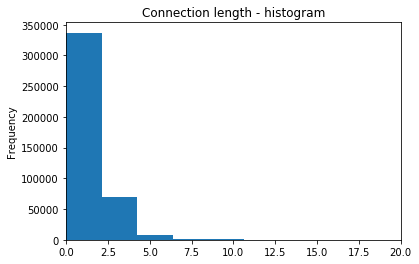

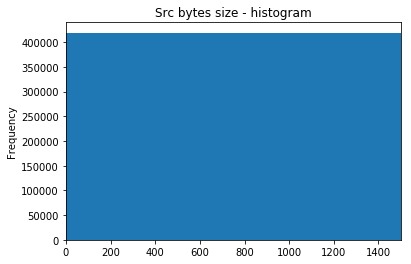

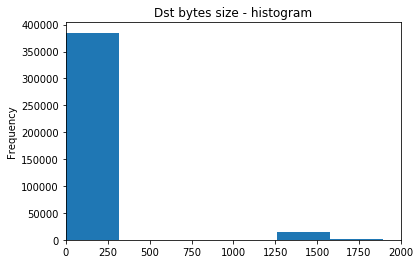

In [23]:
# hisotgrams

#print(max(data['conn len']))
data['conn len'].plot.hist(bins=500, xlim=[0,20], title="Connection length - histogram")
plt.show()

#print(max(data['src bytes']))
data['src bytes'].plot.hist(bins=500, xlim=[0,1500], title="Src bytes size - histogram")
plt.show()

#print(max(data['dst bytes']))
data['dst bytes'].plot.hist(bins=500, xlim=[0,2000], title="Dst bytes size - histogram")
plt.show()

Text(0.5,0.98,'')

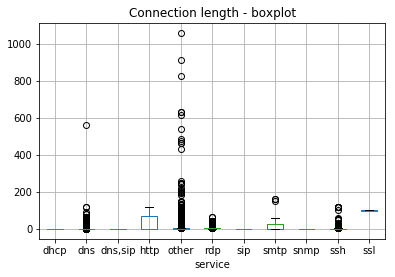

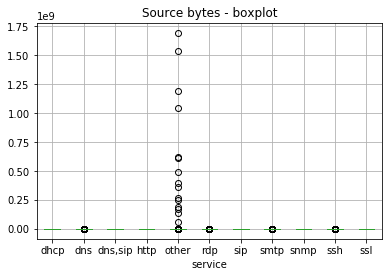

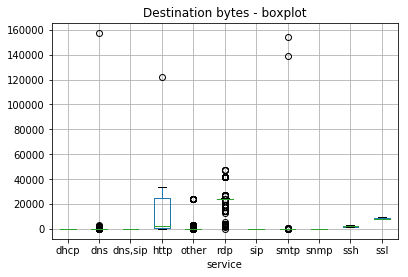

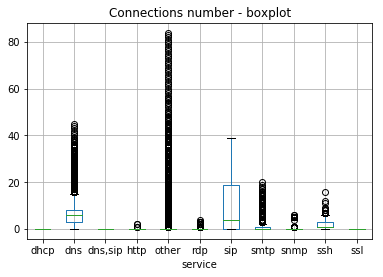

In [24]:
# boxplots
data.boxplot(column='conn len', by='service')
plt.title("Connection length - boxplot")
plt.suptitle("")

data.boxplot(column='src bytes', by='service')
plt.title("Source bytes - boxplot")
plt.suptitle("")

data.boxplot(column='dst bytes', by='service')
plt.title("Destination bytes - boxplot")
plt.suptitle("")

data.boxplot(column='conn numb', by='service')
plt.title("Connections number - boxplot")
plt.suptitle("")

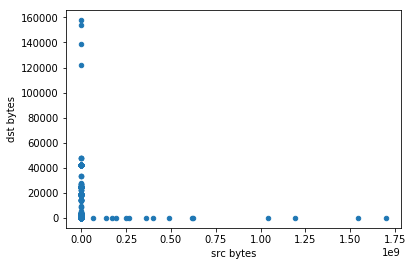

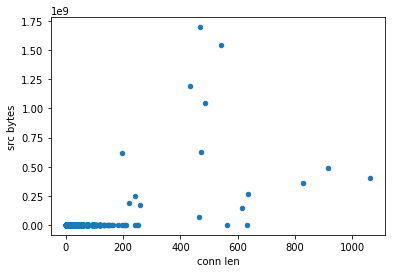

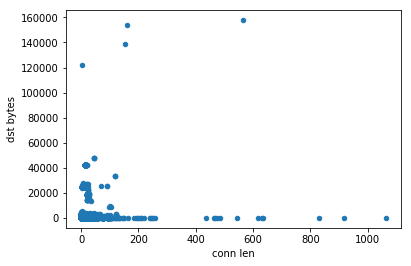

In [25]:
# scatter plots
data.plot.scatter(x='src bytes', y= 'dst bytes')
data.plot.scatter(x='conn len', y= 'src bytes')
data.plot.scatter(x='conn len', y= 'dst bytes')

In [26]:
data.shape

(419146, 292)

## Plot function definition

In [27]:
# plotting method definition

def plot_stats(stat, name, width, rot):
    fig, ax = plt.subplots(figsize=(width, 4))    
    ax.bar(range(len(stat)), list(stat.values()), align='center')
    plt.xticks(range(len(stat)), list(stat.keys()), rotation=rot)
    for a,b in enumerate(stat.items()):
        ax.text(a, b[1] + max(stat.values())/60 , str(round(b[1],5)), horizontalalignment ='center', verticalalignment='baseline')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title(name + " of tested algorithms")
    plt.show()

## Dataset split

In [28]:
data.rename(columns={'Dst host count': 'Dst_host_count', "Dst host srv count" : "Dst_host_srv_count",
                    "Dst host same src port rate" : "Dst_host_same_src_port_rate",
                    "Dst host serror rate" : "Dst_host_serror_rate",
                    "Dst host srv serror rate" : "Dst_host_srv_serror_rate",
                    "Same srv rate" : "Same_srv_rate",
                    "Srv serror rate" : "Srv_serror_rate",
                    "conn len" : "conn_len",
                    "src bytes" : "src_bytes",
                    "dst bytes" : "dst_bytes",
                    "conn numb" : "conn_numb",
                    "Serror rate" : "Serror_rate",
                    "cli src pool" : "cli_src_pool",
                    "registered src pool" : "registered_src_pool",
                    "well-known src pool" : "well_known_src_pool"
                    }, inplace=True)

In [29]:
train, validate, test = np.split(data, [int(.7*len(data)), int(.85*len(data))])

train_ex = train
validate_ex = validate
test_ex = test

train = train.drop(["service", "Conn state", "proto", "src port", "dst port"], axis=1)
validate = validate.drop(["service", "Conn state", "proto", "src port", "dst port"], axis=1)
test = test.drop(["service", "Conn state", "proto", "src port", "dst port"], axis=1)

train = train.sample(frac=1)
validate = validate.sample(frac=1)
test = test.sample(frac=1)

y_train = train.loc[:, "attack_flag"].values.ravel()
X_train = train.drop(["attack_flag"], axis=1)
y_validate = validate.loc[:, "attack_flag"].values.ravel()
X_validate = validate.drop(["attack_flag"], axis=1)
y_test = test.loc[:, "attack_flag"].values.ravel()
X_test = test.drop(["attack_flag"], axis=1)

print(Counter(y_test))
print(Counter(y_validate))
print(Counter(y_train))

Counter({1: 54763, 0: 8109})
Counter({1: 59796, 0: 3076})
Counter({1: 224438, 0: 68964})


## Logistic Regression

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [31]:
hyperparams = {'solver' : ['newton-cg', 'lbfgs', 'sag']}

In [32]:
#sorted(metrics.SCORERS.keys())

In [33]:
# clf = GridSearchCV(LogisticRegression(), hyperparams, cv=5, n_jobs=-1, scoring = "f1")
# clf.fit(X_train, y_train)

# print(clf.best_params_)

# # {'solver': 'newton-cg'}

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression(solver = 'newton-cg')

model = clf.fit(X_train, y_train)

y_pred = model.predict(X_validate)

name = "logistic Regression"

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

Acc[name] = metrics.accuracy_score(y_validate, y_pred)
F1S[name] = metrics.f1_score(y_validate, y_pred)
Prec[name] = metrics.precision_score(y_validate, y_pred)
Rec[name] = metrics.recall_score(y_validate, y_pred)
tn, fp, fn, tp = metrics.confusion_matrix(y_validate, y_pred).ravel()
FPR[name] = fp/(fp+tn)

print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: logistic Regression Accuracy: 0.61352, F1-score: 0.74920, Precision: 0.97851, Recall: 0.60696, FPR: 0.25910
TN: 2279; FP: 797; FN: 23502; TP: 36294



# Decision Tree parameters selection

## Checking tree depth impact

In [35]:
# using gridsearchcv to find the best parameters

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

DecisionTreeClassifier(random_state=0).get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 0,
 'splitter': 'best'}

In [36]:
hyperparams = {'max_depth' : range(1,15)}

In [37]:
clf = GridSearchCV(DecisionTreeClassifier(random_state=0), hyperparams, cv=5, n_jobs=-1, scoring = "f1")
clf.fit(X_train, y_train)

print(clf.best_params_)

# max depth : 13

{'max_depth': 13}


In [59]:
from sklearn import metrics

classifiers = {
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "DecisionTree_ent_13":DecisionTreeClassifier(random_state=0, criterion = "entropy", max_depth = 13),
               "DecisionTree_13":DecisionTreeClassifier(random_state=0, max_depth = 13),
               "DecisionTree_scl":make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=0, max_depth = 13)),
                
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_validate)
    
    Acc[name] = metrics.accuracy_score(y_validate, y_pred)
    F1S[name] = metrics.f1_score(y_validate, y_pred)
    Prec[name] = metrics.precision_score(y_validate, y_pred)
    Rec[name] = metrics.recall_score(y_validate, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_validate, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: DecisionTree Accuracy: 0.97108, F1-score: 0.98480, Precision: 0.98472, Recall: 0.98488, FPR: 0.29714
TN: 2162; FP: 914; FN:  904; TP: 58892

Algorithm: DecisionTree_ent_13 Accuracy: 0.98225, F1-score: 0.99073, Precision: 0.98417, Recall: 0.99737, FPR: 0.31177
TN: 2117; FP: 959; FN:  157; TP: 59639

Algorithm: DecisionTree_13 Accuracy: 0.98357, F1-score: 0.99142, Precision: 0.98466, Recall: 0.99828, FPR: 0.30234
TN: 2146; FP: 930; FN:  103; TP: 59693



/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Algorithm: DecisionTree_scl Accuracy: 0.98231, F1-score: 0.99077, Precision: 0.98338, Recall: 0.99828, FPR: 0.32802
TN: 2067; FP: 1009; FN:  103; TP: 59693



/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


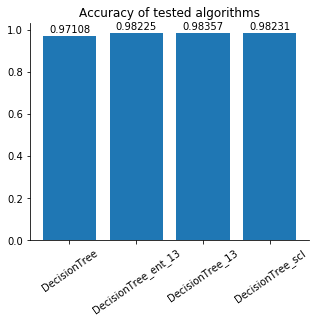

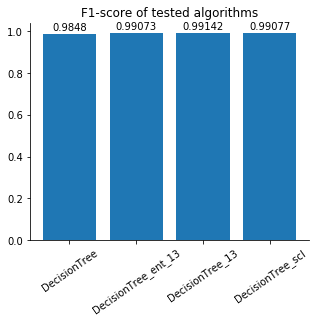

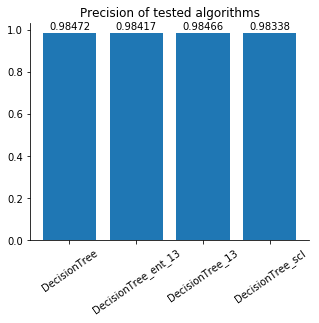

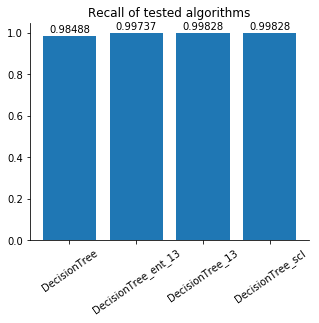

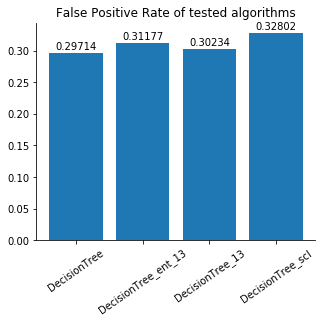

In [60]:
plot_stats(Acc, "Accuracy", 5, 35)
plot_stats(F1S, "F1-score", 5, 35)
plot_stats(Prec, "Precision", 5, 35)
plot_stats(Rec, "Recall", 5, 35)
plot_stats(FPR, "False Positive Rate", 5, 35)

## AdaBoost parameters selection

In [40]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoostClassifier(DecisionTreeClassifier(random_state=0)).get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': False,
 'base_estimator__random_state': 0,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=0,
             splitter='best'),
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [41]:
hyperparams = {"n_estimators" : range (1, 50)}

In [42]:
clf = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(random_state=0)), hyperparams, cv=5, scoring = "f1", n_jobs=-1)
clf.fit(X_train, y_train)

print(clf.best_params_)

# Result: {'n_estimators': 40}, range tested: 1-50

{'n_estimators': 40}


In [66]:
num_trees = 40
seed = 12

classifiers = {
               "AdaBoost_n_est_dct_rs":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 13), n_estimators=num_trees, random_state = seed),
               "AdaBoost_n_est_dct_0":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 13), n_estimators=num_trees, random_state = 0),
               "AdaBoost_n_est_dct_def":AdaBoostClassifier(DecisionTreeClassifier(max_depth = 13), n_estimators=num_trees),
               "AdaBoost_n_est":AdaBoostClassifier(n_estimators=num_trees, random_state = seed),
               "AdaBoost_n_est_0":AdaBoostClassifier(n_estimators=num_trees, random_state = 0), 
               "AdaBoost_orig":AdaBoostClassifier(),
               "AdaBoost_scl":make_pipeline(StandardScaler(), AdaBoostClassifier(DecisionTreeClassifier(max_depth = 13), n_estimators=num_trees, random_state = 0)),
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_validate)
    
    Acc[name] = metrics.accuracy_score(y_validate, y_pred)
    F1S[name] = metrics.f1_score(y_validate, y_pred)
    Prec[name] = metrics.precision_score(y_validate, y_pred)
    Rec[name] = metrics.recall_score(y_validate, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_validate, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: AdaBoost_n_est_dct_rs Accuracy: 0.98252, F1-score: 0.99084, Precision: 0.98723, Recall: 0.99448, FPR: 0.25000
TN: 2307; FP: 769; FN:  330; TP: 59466

Algorithm: AdaBoost_n_est_dct_0 Accuracy: 0.98659, F1-score: 0.99297, Precision: 0.98986, Recall: 0.99610, FPR: 0.19831
TN: 2466; FP: 610; FN:  233; TP: 59563

Algorithm: AdaBoost_n_est_dct_def Accuracy: 0.98300, F1-score: 0.99109, Precision: 0.98768, Recall: 0.99453, FPR: 0.24122
TN: 2334; FP: 742; FN:  327; TP: 59469

Algorithm: AdaBoost_n_est Accuracy: 0.67741, F1-score: 0.80233, Precision: 0.96153, Recall: 0.68836, FPR: 0.53544
TN: 1429; FP: 1647; FN: 18635; TP: 41161

Algorithm: AdaBoost_n_est_0 Accuracy: 0.67741, F1-score: 0.80233, Precision: 0.96153, Recall: 0.68836, FPR: 0.53544
TN: 1429; FP: 1647; FN: 18635; TP: 41161

Algorithm: AdaBoost_orig Accuracy: 0.74652, F1-score: 0.85231, Precision: 0.95579, Recall: 0.76905, FPR: 0.69148
TN: 949; FP: 2127; FN: 13810; TP: 45986



/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Algorithm: AdaBoost_scl Accuracy: 0.98479, F1-score: 0.99204, Precision: 0.98785, Recall: 0.99627, FPR: 0.23830
TN: 2343; FP: 733; FN:  223; TP: 59573



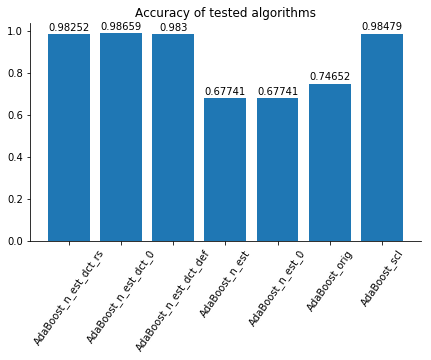

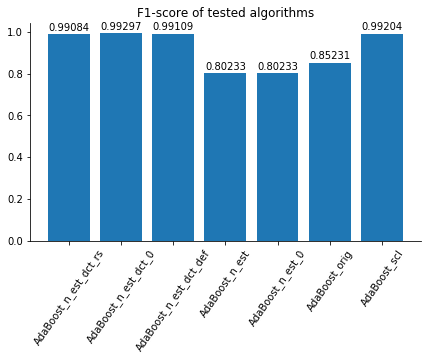

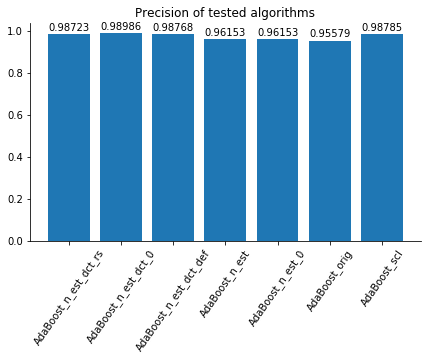

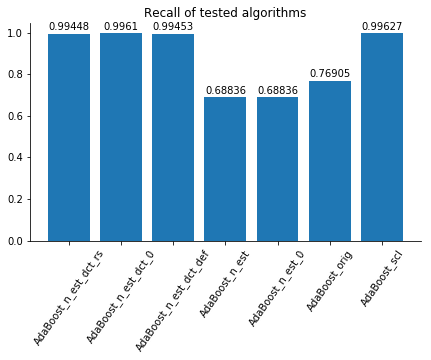

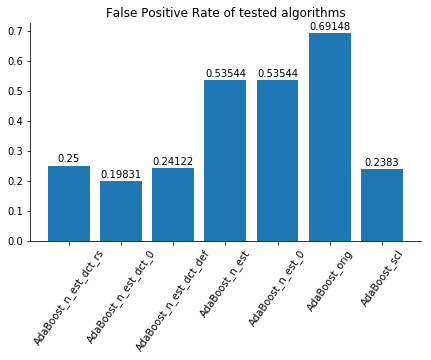

In [67]:
plot_stats(Acc, "Accuracy",7,  55)
plot_stats(F1S, "F1-score", 7, 55)
plot_stats(Prec, "Precision", 7, 55)
plot_stats(Rec, "Recall", 7, 55)
plot_stats(FPR, "False Positive Rate", 7, 55)

## Random tree parameters selection

In [45]:
hyperparams = {'max_depth' : range(1,15)}

In [46]:
clf = GridSearchCV(DecisionTreeClassifier(random_state=0, splitter = "random"), hyperparams, cv=5, scoring = "f1", n_jobs=-1)
clf.fit(X_train, y_train)

print(clf.best_params_) # --> 14

{'max_depth': 14}


In [47]:
classifiers = {
                "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
                "RandomTree_14":DecisionTreeClassifier(random_state=0, splitter = "random", max_depth = 14),                
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_validate)
    
    Acc[name] = metrics.accuracy_score(y_validate, y_pred)
    F1S[name] = metrics.f1_score(y_validate, y_pred)
    Prec[name] = metrics.precision_score(y_validate, y_pred)
    Rec[name] = metrics.recall_score(y_validate, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_validate, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))


Algorithm: RandomTree   Accuracy: 0.95850, F1-score: 0.97800, Precision: 0.98616, Recall: 0.96998, FPR: 0.26463
TN: 2262; FP: 814; FN: 1795; TP: 58001

Algorithm: RandomTree_14 Accuracy: 0.94785, F1-score: 0.97216, Precision: 0.98749, Recall: 0.95729, FPR: 0.23570
TN: 2351; FP: 725; FN: 2554; TP: 57242



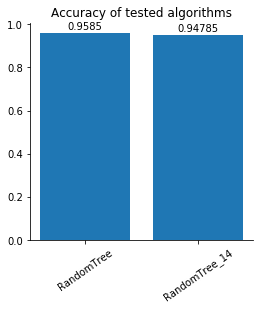

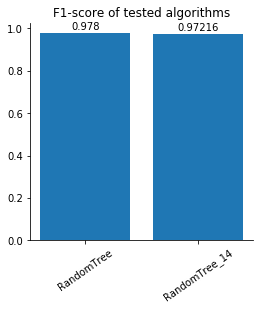

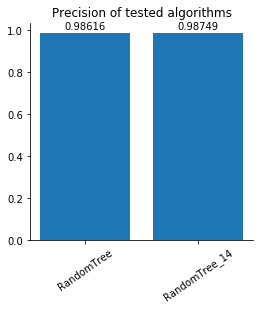

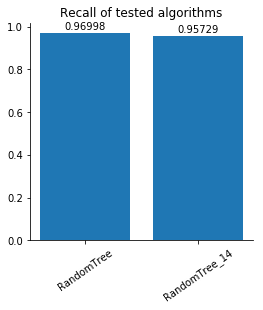

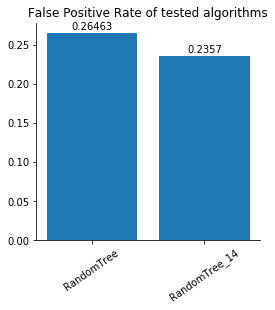

In [48]:
plot_stats(Acc, "Accuracy",4, 35)
plot_stats(F1S, "F1-score", 4, 35)
plot_stats(Prec, "Precision", 4, 35)
plot_stats(Rec, "Recall", 4, 35)
plot_stats(FPR, "False Positive Rate", 4, 35)

## Random Forest parameters selection

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 

RandomForestClassifier(random_state=0).get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [50]:
hyperparams = {'n_estimators' : range(1, 200)}

In [51]:
clf = GridSearchCV(RandomForestClassifier(random_state=0), hyperparams, cv=5, scoring = "f1", n_jobs=-1)
clf.fit(X_train, y_train)

n_estimators_calc = clf.best_params_['n_estimators'] 
print(clf.best_params_)

# # {'n_estimators': 167}

{'n_estimators': 167}


In [52]:
hyperparams = {'max_features' : [None, 'auto', 'sqrt', 'log2']}

In [53]:
clf = GridSearchCV(RandomForestClassifier(random_state=0, n_estimators=41), hyperparams, cv=5 ,scoring = "f1", n_jobs=-1)
# clf.fit(X_train, y_train)

# print(clf.best_params_)
# {'max_features': 'auto'}

In [54]:
hyperparams = {'max_depth' : range(1,50)}

In [55]:
clf = GridSearchCV(RandomForestClassifier(random_state=0, n_estimators=n_estimators_calc, max_features='auto'), hyperparams, cv=5, scoring = "f1", n_jobs=-1)
clf.fit(X_train, y_train)

print(clf.best_params_)
# {'max_depth': 38}

{'max_depth': 38}


In [68]:
# # zmiana n_estimators daje poprawe
# # kfold tylko dla crossvalidation
# # learning rate [1 - default] najlepsze wyniki
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

classifiers = {
                "RandomForest_new":RandomForestClassifier(n_estimators=167, max_depth=38, random_state=0),
                "RandomForest_new_scl":make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators=167, max_depth=38, random_state=0)),
                "RandomForest_orig":RandomForestClassifier(n_estimators=100),
}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_validate)
    
    Acc[name] = metrics.accuracy_score(y_validate, y_pred)
    F1S[name] = metrics.f1_score(y_validate, y_pred)
    Prec[name] = metrics.precision_score(y_validate, y_pred)
    Rec[name] = metrics.recall_score(y_validate, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_validate, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))

Algorithm: RandomForest_new Accuracy: 0.98409, F1-score: 0.99169, Precision: 0.98590, Recall: 0.99754, FPR: 0.27731
TN: 2223; FP: 853; FN:  147; TP: 59649



/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Algorithm: RandomForest_new_scl Accuracy: 0.98432, F1-score: 0.99181, Precision: 0.98586, Recall: 0.99783, FPR: 0.27828
TN: 2220; FP: 856; FN:  130; TP: 59666

Algorithm: RandomForest_orig Accuracy: 0.98263, F1-score: 0.99093, Precision: 0.98468, Recall: 0.99726, FPR: 0.30169
TN: 2148; FP: 928; FN:  164; TP: 59632



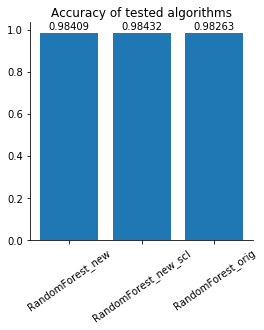

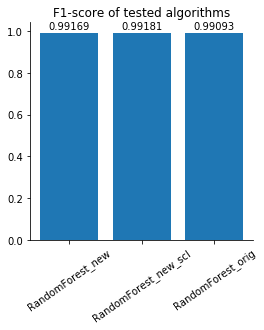

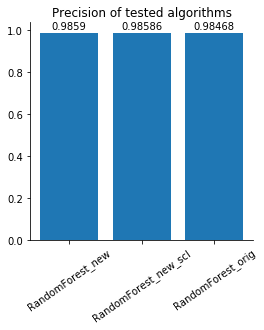

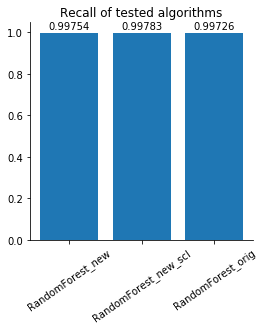

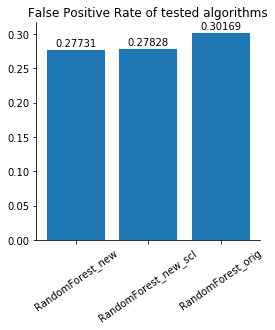

In [69]:
plot_stats(Acc, "Accuracy", 4, 35)
plot_stats(F1S, "F1-score", 4, 35)
plot_stats(Prec, "Precision", 4, 35)
plot_stats(Rec, "Recall", 4, 35)
plot_stats(FPR, "False Positive Rate", 4, 35)